# K Means Algorithm

---------------------------------------------------------------------------------------------------------------------
### The definiton K Means

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

### Algorithm
1. Choose n random points on the graph as the centroids of each cluster.
2. Calculate the Euclidean distance between each data point and chosen clusters’ centroids. 
    A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other ones.
3. After assigning all observations to the clusters, calculate the clustering score, by summing up all the Euclidean distances between each data point and the corresponding centroid.
4. Define the new centroid of each cluster by calculating the mean of all points assigned to that cluster.
5. Repeat from step 2 until the positions of the centroids no longer move and the assignments stay the same.

### Application
* customer profiling
* market segmentation
* computer vision
* search engines
* astronomy

---------------------------------------------------------------------------------------------------------------------
### Advantages
* Fast, robust and easier to understand.

* Relatively efficient: O(tknd), where n is # objects, k is # clusters, d is # dimension of each object, and t  is # iterations. Normally, k, t, d << n.

* Gives best result when data set are distinct or well separated from each other.

### Disadvantages
* The learning algorithm requires apriori specification of the number of  cluster centers.

* The use of  Exclusive Assignment - If  there are two highly overlapping data then k-means will not be able to resolve       that there are two clusters.

* The learning algorithm is not invariant to non-linear transformations i.e. with different representation of data we get different results (data represented in form of cartesian co-ordinates and polar co-ordinates will give different results).

* Euclidean distance measures can unequally weight underlying factors.

* The learning algorithm provides the local optima of the squared error function. 

* Randomly choosing of the cluster center cannot lead us to the fruitful result. Pl. refer Fig.

* Applicable only when mean is defined i.e. fails for categorical data.

* Unable to handle noisy data and outliers.

* Algorithm fails for non-linear data set.

---------------------------------------------------------------------------------------------------------------------

### References 
* https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203/
* https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm
* https://blog.bioturing.com/2018/10/17/k-means-clustering-algorithm-and-example/

In [28]:
%matplotlib inline
%conda install pillow
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Example 1 - Random Dataset Plot

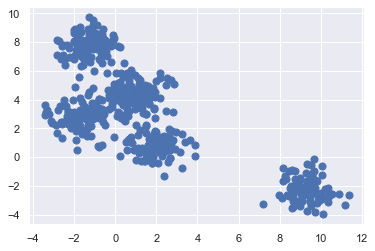

In [34]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

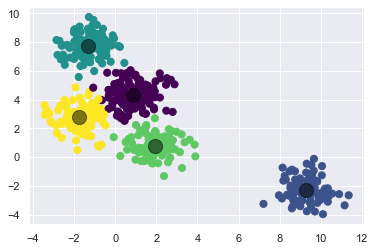

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Example 2 - Image Color Compression

In [60]:
from PIL import Image
from itertools import cycle
from matplotlib.pyplot import imshow

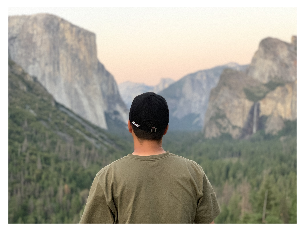

In [75]:
from sklearn.datasets import load_sample_image
Yosemite = Image.open('./data/Yosemite2.jpg').convert('RGB')
Yosemite = np.array(Yosemite)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(Yosemite);

In [76]:
Yosemite.shape

(3024, 4032, 3)

In [80]:
data = Yosemite / 255.0 # use 0...1 scale
data = data.reshape(3024 * 4032, 3)
data.shape

(12192768, 3)

In [81]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

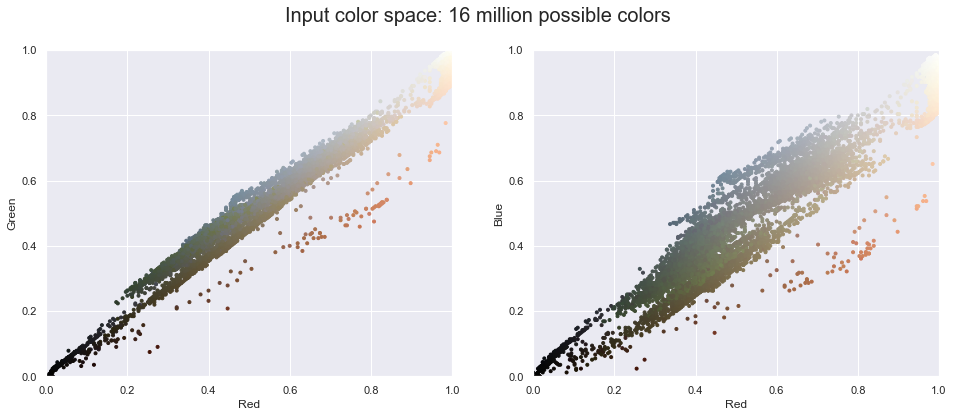

In [82]:
plot_pixels(data, title='Input color space: 16 million possible colors')


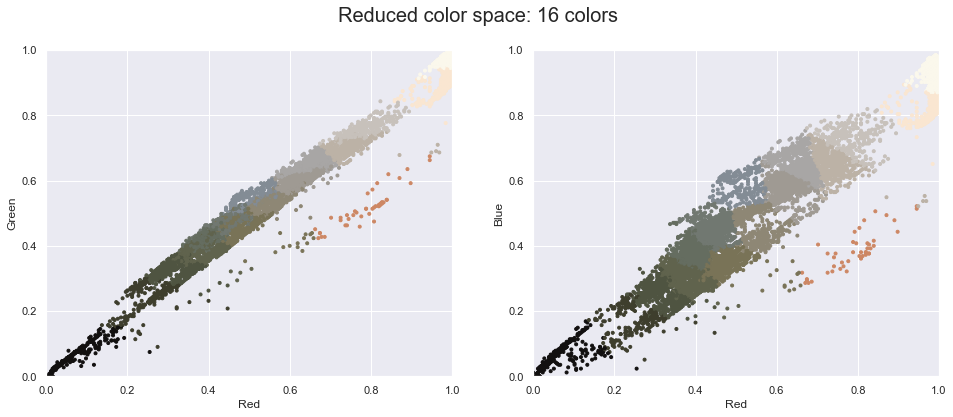

In [83]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

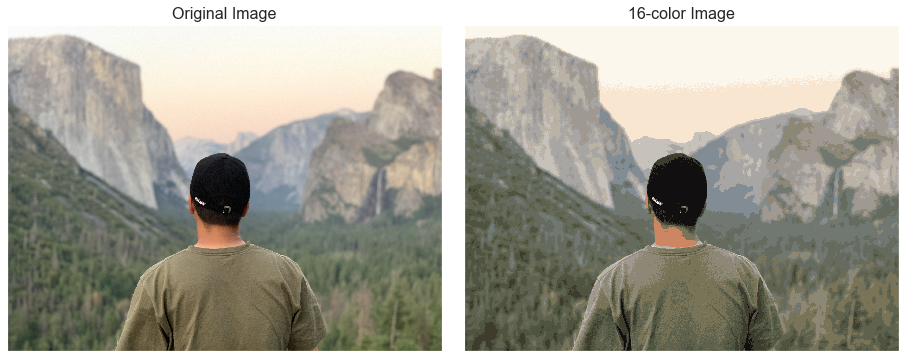

In [84]:
Yosemite_recolored = new_colors.reshape(Yosemite.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(Yosemite)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(Yosemite_recolored)
ax[1].set_title('16-color Image', size=16);